# Quantum Computing

## 1. Qubits

**Frank C Langbein**

$\def\ket#1{|#1\rangle} \def\bra#1{\langle{}#1|}$

# References

  * B Schumacher, M Westmoreland. **Quantum Processes Systems**, and Information. Cambridge University Press, 2010.
  * MA Nielsen, IL Chuang. **Quantum Computation and Quantum Information**. Cambridge University Press, 2002.

# Quantum Computers

  * IBM Q Experience - https://quantum-computing.ibm.com/
  * D-Wave LEAP - https://www.dwavesys.com/take-leap

# Simulators

  * **Quirk** - https://algassert.com/quirk
  * **QuTIP** - http://qutip.org/
  * **Qiskit** - https://qiskit.org/
  * **Quantum Computing Playground** - http://www.quantumplayground.net/
  * Many more... https://quantiki.org/wiki/list-qc-simulators

In [1]:
from qutip import *
from qutip.qip.operations import *
import numpy as np

# Qubits

* A qubit is $\ket{\Phi} = a\ket{0} + b\ket{1}$, $a,b \in\mathbb{C}$
    * Forms a vector space over $\mathbb{C}^2$ with basis
      $$\ket{0} = \begin{bmatrix}1\\0\end{bmatrix}, \ket{1} = \begin{bmatrix}0\\1\end{bmatrix}$$
    * Normalised: $a^2 + b^2 = 1$
    * Point $(\phi,\theta)$ on the Bloch sphere (ignoring global phase $\gamma$)
      $$a = e^{i\gamma} \cos\left(\frac{\phi}{2}\right), b = e^{i(\gamma + \theta)} \sin\left(\frac{\phi}{2}\right)$$
* Qubit is in **superposition** of $\ket{0}$ and $\ket{1}$
    * with probability $a^2$ in $\ket{0}$ and probability $b^2$ in $\ket{1}$

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]] 
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


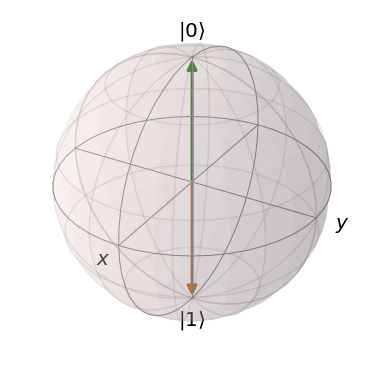

In [2]:
Zero = basis(2,0)
One = basis(2,1)
print(Zero,"\n",One)

b = Bloch()
b.add_states([Zero,One])
b.show()

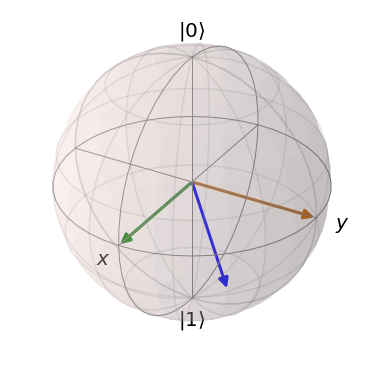

In [3]:
psi_x = (Zero + (1+0j) * One).unit()
psi_y = (Zero + (0+1j) * One).unit()
psi_z = (Zero + (1+1j) * One).unit()

b = Bloch()
b.add_states([psi_x,psi_y,psi_z])
b.show()

# Single Qubit Gates

* (Pure) quantum program for a single qubit: **rotation on the Bloch sphere**
    * This is a unitary operator $U$ (bounded, linear, $UU^\dagger = U^\dagger U = I$)
    * Could be constructed from individual operations (gates; unitary operators)
    * Change the phase (rotation around z axis)
    * Change the probability of being in $\ket{0}$ or $\ket{1}$ (rotation around x or y axis)
    * Or arbitrary combinations of these
* E.g. the **Hadamard gate**
    $$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ \end{bmatrix}$$
    * Used to put qubits into a superposition state: map $\ket{0}$ to $\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \ket{+}$
    * Also $\ket{-} = \frac{1}{\sqrt{2}}(\ket{0}-\ket{1}$
    * $\pi/2$ rotation about Z, then $\pi/2$ rotation about Y axis
  * $\ket{+}, \ket{-}$ forms the **superposition/Hadamard basis** (compared to $\ket{0}, \ket{1}$ Z basis)

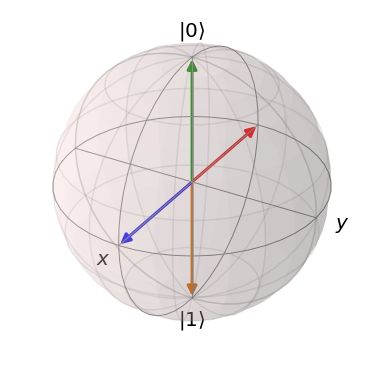

In [4]:
H = 1/np.sqrt(2) * Qobj([[1,1],[1,-1]]) # or H = snot()

Psi0 = H * ket("0") # or Zero
Psi1 = H * ket("1") # or One

b = Bloch()
b.add_states([ket("0"),ket("1"),Psi0,Psi1])
b.show()

# Common Single Qubit Gates

* Pauli gates: half turn ($\pi$) around X, Y, Z axis
    $$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \qquad
      Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \qquad
      Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$
* Hadamard gate
    $$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ \end{bmatrix}$$
* ^1/2 ($\pi/2$), ^1/4 ($\pi/4$), ^1/8 ($\pi/8$) Pauli gates, etc.; e.g. the phase gate
    $$S = Z^{\frac{1}{2}} = \begin{bmatrix} 1 & 0\\ 0 & i \end{bmatrix}; SS=Z$$
    
* General single qubit gate
    $$U = \begin{bmatrix} \cos(\theta/2)            & -e^{i\lambda} \sin(\theta/2)\\
                          e^{i\phi}\sin(\theta/2)   & e^{i\lambda+i\phi} \cos(\theta/2)\end{bmatrix}$$
* Note, any quantum gate $U$ must be a unitary operation: $U U^\dagger = I$

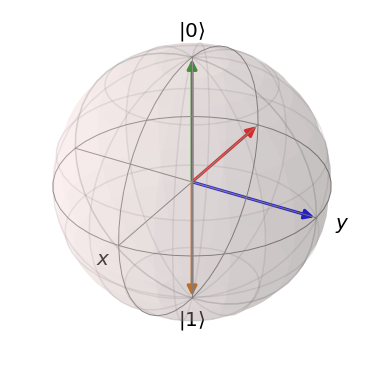

In [5]:
X = sigmax()
Y = sigmay()
Z = sigmaz()

Psi1 = Y * ket("0")
Psi2 = X.sqrtm() * Psi1
Psi3 = Z.sqrtm() * Psi2

b = Bloch()
b.add_states([ket("0"),Psi1,Psi2,Psi3])
b.show()

  * [Quirk](quirk.html#circuit={"cols":[["Y","X","Z"],["X^½"],["Z^½"],["Sample3"]]})

# Measurements

* Non-unitary part of quantum programs (projective) to read out state (probabilisitic, dependent on measurement basis)
* A quantum measurment is described by a set of measurement operators $\{M_m\}$
    * Index $m$ refers to the measurement outcome (e.g. $0$, $1$)
* Probability that the results $m$ occurs for a state $\ket{\Psi}$ is
  $$p_m = \langle \Psi | M_m^\dagger M_m | \Psi \rangle$$
    * $\langle\Psi|$ is $\ket{\Psi}$ (column vector; ket) as row vector (complex conjugate transpose; dagger; bra)
* The state of the system after the measurement, resulting in $m$, is
  $$\frac{M_m|\Psi\rangle}{\sqrt{p_m}}$$
* The opeartors must satisfy the completeness equation
  $$\sum_m \frac{M_m|\Psi\rangle}{\sqrt{p_m}} = I$$
 

# Projective Measurements

* Simplest type of measurements, where $M_m^2 = M_m$

* Measurement operators for the "Z basis":
    $$M_0 = |0\rangle\langle0| = \begin{bmatrix} 1 & 0\\ 0 & 0 \end{bmatrix}$$
    $$M_1 = |1\rangle\langle1| = \begin{bmatrix} 0 & 0\\ 0 & 1 \end{bmatrix}$$
    
* For $\ket{\Psi} = a \ket{0} + b\ket{1}$:
      * $p_0 = \langle\Psi|M_0^\dagger M_0|\Psi\rangle =  a^2$
      * $p_1 = \langle\Psi|M_1^\dagger M_1|\Psi\rangle = b^2$

In [6]:
M0 = ket("0") * bra("0")
M1 = ket("1") * bra("1")

print(M0.full()); print(M1.full()) # .full() to simplify output

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [7]:
Psi = (ket("0") + ket("1")).unit()  # |+>
p_0 = Psi.dag() * (M0.dag() * M0) * Psi
p_1 = Psi.dag() * (M1.dag() * M1) * Psi

print(p_0.full(),p_1.full())

[[0.5+0.j]] [[0.5+0.j]]


In [8]:
Psi = (ket("0") - ket("1")).unit() # |->
p_0 = Psi.dag() * (M0.dag() * M0) * Psi
p_1 = Psi.dag() * (M1.dag() * M1) * Psi

print(p_0.full(),p_1.full())

[[0.5+0.j]] [[0.5+0.j]]


* Measurement operators for the superposition basis
    $$M_+ = |+\rangle\langle+| = \frac{1}{2} \begin{bmatrix} 1 & 1\\ 1 & 1 \end{bmatrix}$$
    $$M_- = |-\rangle\langle-| = \frac{1}{2} \begin{bmatrix} 1 & -1\\ -1 & 1 \end{bmatrix}$$ 

In [9]:
MP = (ket("0") + ket("1")).unit () * (bra("0") + bra("1")).unit () 
MM = (ket("0") - ket("1")).unit () * (bra("0") - bra("1")).unit () 

print(MP.full()); print(MM.full())

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]


In [10]:
Psi = (ket("0") + ket("1")).unit()
p_P = Psi.dag() * (MP.dag() * MP) * Psi
p_M = Psi.dag() * (MM.dag() * MM) * Psi

print(p_P.full(),p_M.full()) 

[[1.+0.j]] [[0.+0.j]]


In [11]:
Psi = (ket("0") - ket("1")).unit()
p_P = Psi.dag() * (MP.dag() * MP) * Psi
p_M = Psi.dag() * (MM.dag() * MM) * Psi

print(p_P.full(),p_M.full())

[[0.+0.j]] [[1.+0.j]]


# Measurement basis

* Some states are not distinguishable in a particular measurement basis
    * Cannot distinguish phase of $\ket{+}$ and $\ket{-}$ when measuring in the Z basis
    * That means we can never know the full quantum state (cf. Heisenberg uncertainty)
* We cannot arbitrarily specify the measurement basis (usually it is fixed to the Z basis)
    * So how can we distinguish between $\ket{+}$ and $\ket{-}$?
    * Try it with this [quirk circuit](quirk.html#circuit={"cols":[["H","X"],[1,"H"],["Bloch","Bloch"]]}).
  
* Understand probability vs. phase vs. measurement basis
    * E.g. z-axis rotations in the Z vs superposition measurement basis
    * [Circuit](quirk.html#circuit={"cols":[["H","H","H","H","H","X"],[1,1,1,1,1,"H"],["Bloch","Bloch","Bloch","Bloch","Bloch","Bloch"],[1,"Z^¼","Z^½","Z^½","Z"],[1,1,1,"Z^¼"],["Bloch","Bloch","Bloch","Bloch","Bloch","Bloch"],["H","H","H","H","H","H"]]})


# Multiple Qubits

* Tensor product of single qubit states
    * Two qubit states: $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$
    * Three qubit states: $\ket{000}$, $\ket{001}$, $\ket{010}$, $\ket{011}$, ...
    * Qubits from right-to-left are top-down in the circuit (right-most/top bit is the least significant bit; but not always used consistently)
* Single states:
    * $\Psi_0 = a \ket{0} + b \ket{1}$
    * $\Psi_1 = c \ket{0} + d \ket{1}$
    * $\Psi_2 = e \ket{0} + f \ket{1}$
* To combine qubits, take **tensor product** states:
    \begin{align}
      \Psi_{10} = \Psi_1 \otimes \Psi_0 & = ca\ket{0_10_0} + cb\ket{0_11_0} + da\ket{1_10_0} + db\ket{1_11_0}\\
      \Psi_2 \otimes \Psi_{10} &= eca\ket{0_20_10_0} + ecb\ket{0_20_11_0} + eda\ket{0_21_10_0} + edb\ket{0_21_11_0}\\
       &+ fca\ket{1_20_10_0} + fcb\ket{1_20_11_0} + fda\ket{1_21_10_0} + fdb\ket{1_21_11_0}
    \end{align} 
* Note $\ket{0_1}\otimes\ket{0_0} = \ket{0_10_0} = \ket{00}$, ...

# Entanglement

* The tensor product space contains all states with correlations between measurements of individual qubits
  * Some are classical (cf. classical probabilities, e.g. iid vs. hidden rules)
  * Some are stronger/weaker (quantum)

* Quantum correlations are the essence of **entanglement**
  * Knowledge about the measurment result of one qubit perfectly predicts the measurement outcome of another qubit
  * E.g. $\frac{1}{\sqrt{2}} \left(\ket{00} - \ket{11}\right)$, $\frac{1}{\sqrt{2}} \left(\ket{01} + \ket{10}\right)$
  * Note, such states are not representable as a (tensor) product of single qubits (we need something else to get these states)

# CNOT - a Two-Qubit Gate

* Controlled-not (CNOT) gate: 
   $$\begin{bmatrix}
     1 & 0 & 0 & 0\\
     0 & 1 & 0 & 0\\
     0 & 0 & 0 & 1\\
     0 & 0 & 1 & 0
     \end{bmatrix}
     \left(a\ket{0_c0_t} + b\ket{0_c1_t} + c\ket{1_c0_t} + d\ket{1_c1_t}\right)
     =
     \begin{bmatrix}
     1 & 0 & 0 & 0\\
     0 & 1 & 0 & 0\\
     0 & 0 & 0 & 1\\
     0 & 0 & 1 & 0
     \end{bmatrix}
     \begin{bmatrix}
      a\\b\\c\\d
     \end{bmatrix}
     $$
   $$= a\ket{0_c0_t} + b\ket{0_c1_t} + d\ket{1_c0_t} + c\ket{1_c1_t}
     = \begin{bmatrix} a & b & d & c \end{bmatrix}^t$$
    * Careful with pure vector notation and qubit basis order (it is in order of decimal value of basis-bits); usually better to keep the states instead of only using vectors
* Apply a NOT gate (the X gate) to the target qubit only if the control qubit is $\ket{1}$
    * [Circuit](quirk.html#circuit={"cols":[["X","X^t"],["Bloch","Bloch"],["X","•"]]})

# Full Entanglement Circuit with Operators

* Creating entanglement with CNOT gates
    * [Entanglement Circuit](quirk.html#circuit={"cols":[["Amps2"],[],["H","X"],["Amps2"],[],["•","X"],["Amps2"]]})

* Compute the linear operator for this
  * $\otimes$ as **tensor product** (**Kronecker product**) on the linear operators, e.g.:
  $$\begin{bmatrix}
  a & b\\
  c & d\\
  \end{bmatrix}
  \otimes
  \begin{bmatrix}
  W & X\\
  Y & Z\\
  \end{bmatrix} = 
  \left[\begin{array}{cc|cc}
  aW & aX & bW & bX\\
  aY & aZ & bY & bZ\\\hline
  cW & cX & dW & dX\\
  cY & cZ & dY & dZ
  \end{array}\right]$$
 
* CNOT on 2 qubit circuit, where qubit 1 is control and qubit 0 is target:
  $$\text{CNOT} = \ket{0}\bra{0} \otimes I + \ket{1} \bra{1} \otimes X = \text{CNOT}(2,1,0)$$
    * Note operator on top-most / right-most (least significant) qubit is right-most in tensor product

* For qubit 1 as control and qubit 0 as target we get

In [12]:
print(np.real( (tensor( ket("0")*bra("0"), qeye(2) ) + tensor( ket("1")*bra("1"), sigmax()) ).full() ))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


* For qubit 0 as control and qubit 1 as target we get

In [13]:
print(np.real( (tensor( qeye(2), ket("0")*bra("0") ) + tensor(sigmax(), ket("1")*bra("1")) ).full() ))

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


* So the full circuit is described by the following matrix operations:

In [14]:
H = snot() * np.sqrt(2) # Remove normalisation for ease of reading
X = sigmax()
XH = tensor(X,H)

print(X.full()," x"); print(H.full()," ="); print(XH.full())

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]  x
[[ 1.+0.j  1.+0.j]
 [ 1.+0.j -1.+0.j]]  =
[[ 0.+0.j  0.+0.j  1.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j -1.+0.j]
 [ 1.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j -1.+0.j  0.+0.j  0.+0.j]]


In [15]:
CNOT = tensor( qeye(2), ket("0")*bra("0") ) + tensor(sigmax(), ket("1")*bra("1") )
CIRCUIT = CNOT*XH

print('CNOT*(X x H) ='); print(CIRCUIT.full())

CNOT*(X x H) =
[[ 0.+0.j  0.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j -1.+0.j]]


In [16]:
print((CIRCUIT * ket("00") / np.sqrt(2)).full()) # divive by sqrt(2) to normalise (see above)

[[0.        +0.j]
 [0.70710678+0.j]
 [0.70710678+0.j]
 [0.        +0.j]]


# Multi-Qubit Gates

* Any arbitrary unitary transformation on $n$ qubits can be constructed from single qubit gates and CNOT.
    * Still useful to have other gates
  
* Generalise CNOT to applying other single qubit gates $U$:
  $$\ket{0}\bra{0} \otimes I + \ket{1}\bra{1} \otimes U$$

In [17]:
U = snot()
print((tensor(ket("0")*bra("0"),qeye(2)) + tensor(ket("1")*bra("1"),U)).full())

[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  1.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


* Anti-controlled single qubit gates:
  $$\ket{1}\bra{1} \otimes I + \ket{0}\bra{0} \otimes U$$

In [18]:
U = sigmax()
print((tensor(ket("1")*bra("1"),qeye(2)) + tensor(ket("0")*bra("0"),U)).full())

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


* Or use multiple controls (same with anti-controls)
 $$(\ket{00}\bra{00} + \ket{01}\bra{01} + \ket{10}\bra{10})\otimes I + \ket{11}\bra{11} \otimes U$$

In [19]:
U = sigmax()
print(np.real( (tensor((ket("00")*bra("00")+ket("01")*bra("01")+ket("10")*bra("10")),qeye(2)) + \
               tensor(ket("11")*bra("11"),U)                                                    ).full() ))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


# Circuit Diagrams and Operators

* Sort top-down qubits in quantum circuit to right-to-left tensor product to get the state
  * Least significant bit is right-most in ket and top-most in circuit
* Take tensor product (Kronecker product) of stacked gates on qubits where top-down order becomes right-to-left order in product
  * For any quantum wire without a gate insert a $2\times 2$ identity matrix
  * Can ignore qubits not involved at all (for simplicitly) 
    * until they become relevant (then expand with tensor product; careful to not mix up the order)
* Resulting operators from left-to-right in circuit are (matrix) multiplied right-to-left to get operator of circuit
  * Initial state (usually $\ket{0...0}$) is multiplied from the right with the opeartor
  * Note, initial sate $\ket{0...0}$ means the first column of the full operator defines the result

* Can ignore normalisation (and normalise in the end such that matrix is unitary or state vector represents probabilities / squares sum up to one)
* Note, in the matrix-vector represetnation with the Z basis, the order of the entries in the vector is determined by the decimal value of the qubit
* Use numpy and/or qutip to compute full circuit operators, etc.
  * Mapping of basis states gives a clue of what basic circuits are doing
* There are other ways to order this and can use different basis, so be careful

# More Operations

 * There is no quantum operation that can copy a qubit (**no cloning theorem**)
   * All operations must be unitary (if they aren't, they are not purely quantum)
   * Meassurements are not unitary (but destroy the quantum state)
 * There is a gate to swap the state between two qubits
   * [swap](quirk.html#circuit={"cols":[["H"],["Bloch","Bloch"],["X","•"],["•","X"],["X","•"],["Bloch","Bloch"]]}) (or linked "x" in the circuit)

 * [Identical circuits for multi-controlled gates](quirk.html#circuit={"cols":[["X","•","•"],[1,1,1,"X^½","•"],[1,1,1,1,"X","•"],[1,1,1,"X^-½","•"],[1,1,1,1,"X","•"],[1,1,1,"X^½",1,"•"]]})
   * There are multiple options to create the same full operator from individual gates (depending on which gates you have available; various sets of gates are universal / can generate all possible unitary operators/circuits)


# Density Matrices


 * Density matrix of state $\ket{\Psi}$ is simply $\ket{\Psi}\bra{\Psi}$
   * Diagonal elements contain probabilities of being in the specific states (trace/sum of diagonal elements is $1$)
   * Off-diagonal elements are the coherences (coupling between the states)
   * E.g. [Density Example](quirk.html#circuit={"cols":[["H"],["Bloch","Bloch"],["X","•"],["•","X"],["X","•"],["Bloch","Bloch"],["Density2"]]})

